## Diagnosing a breast tumor as cancerous (Malignant) or not (Benign) correctly makes a big difference in life expectancy and quality of life of a patient. Misdiagnosis of a breast tumor can have drastic consequences on the medical condition of a patient. In many cases, quite frequently misdiagnosis of breast tumors happen in the presence of human intervention and medical experts. So, it means that sometimes even medical experts are not able to diagnose breast tumors correctly. Hence, it becomes very important to develop a Machine Learning based system which can diagnose breast tumors correctly at a very high rate, possibly even higher than medical experts. So, given a dataset of breast tumors we must develop a system which will learn to perform correct diagnosis of breast tumors from the same dataset.

### In order to solve this problem, we will using the Wisconsin Breast Cancer Tumor dataset to train a Naive Bayes Classifier from scratch without using scikit-learn, while also uncovering the mathematics behind it in brief, to classify the tumors as either Benign or Malignant and the evaluating it's performance.  

### So, let's start. 

### First, let's import the necessary libraries which we will be using here. 

In [1]:
import pandas as pd
# For loading data as Pandas Dataframe
import numpy as np
# For performing Matrix Calculations
import seaborn as sns
# For visualizing statistical results
import scipy.stats as s
# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# For evaluating the performance of the model

### Download the dataset from the following link: 
### https://drive.google.com/file/d/1JCgSmjL1AdssrFmZpGDJJVEhXSp72U8Q/view?usp=sharing

### Now, let's read the Wisconsin Breast Cancer Tumor Dataset

In [2]:
data = pd.read_csv("data.csv")

### Let's try to look on our dataset. 

In [3]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### As can be seen that the dataset has 33 columns and since, the column having name "Unnamed: 32" has all the missing values therefore first of all we will get rid of that column.

In [4]:
data_columns = data.columns

In [5]:
data_columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [6]:
len(data_columns)

33

### Removing the "Unnamed : 32" column from our dataset. 

In [7]:
data.drop(labels=data_columns[32],axis=1,inplace=True)

In [8]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Let's try getting some statistical information about the dataset. 

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### One very valuable information that we can draw from this statistical information is that majority of the features in our dataset is floating point type except for 'id' and 'diagnosis' features. 

### It was very easy for us to determine through visual inspection that "Unnamed : 32" feature has NaN values but it's quite difficult to determine that any other features has some missing values or not just by sheer visual inspection so let's try to determine that whether any other feature has missing values or not. 

In [10]:
data.isnull().sum().sort_values(ascending=False)

fractal_dimension_worst    0
symmetry_worst             0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
id                         0
dtype: int64

### As it can be observed that none of the other features has missing values so we don't have to probably drop any other feature now. 

### Let's generate some random good data which should be desirable but we don't always get such kind of data. 

In [11]:
data_columns = list(data_columns)
data_columns.remove('id')
data_columns.remove('diagnosis')
data_columns.remove('Unnamed: 32')

In [12]:
print(data_columns)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [13]:
sample_good_data = {'X':np.concatenate((np.random.normal(loc=50,scale=3,size=(284,)),
                               np.random.normal(loc=80,scale=5,size=(285,))),axis=0),
     'diagnosis':np.concatenate((np.array(['B']*284),np.array(['M']*285)),axis=0)}
sample_good_data = pd.DataFrame(data=sample_good_data)

### In order to perform as much best classification as possible, in ideal scenario the data should look something like that:

<AxesSubplot:xlabel='X'>

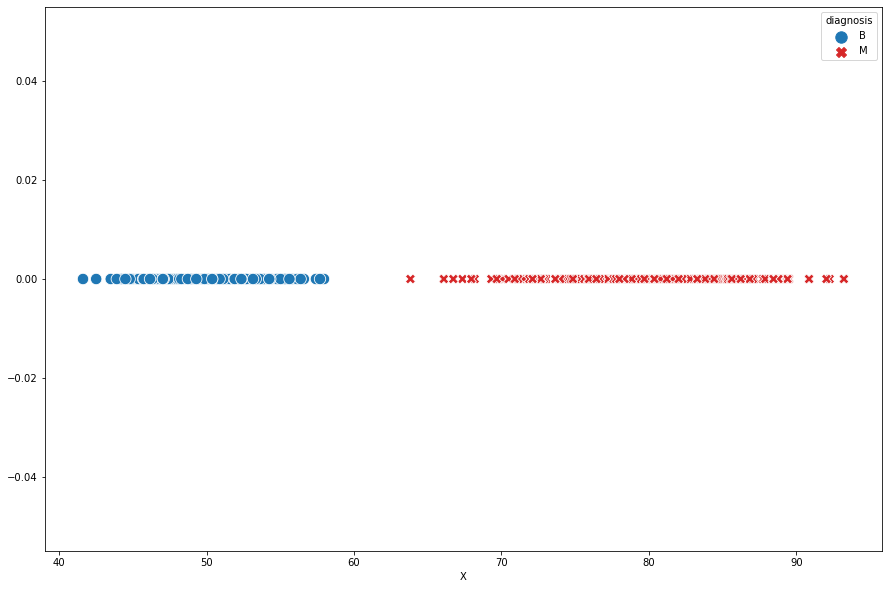

In [14]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=sample_good_data,x=sample_good_data.columns[0],y=[0]*len(sample_good_data),hue='diagnosis',
             palette=[sns.color_palette()[0],sns.color_palette()[3]],style='diagnosis',size='diagnosis',
               sizes=(100,130))

### And their distributions in blue which can be labelled as $P(X|Class=Benign)$ and in red which can be labelled as $P(X|Class=Malignant)$, will look like this:

<AxesSubplot:xlabel='X', ylabel='Density'>

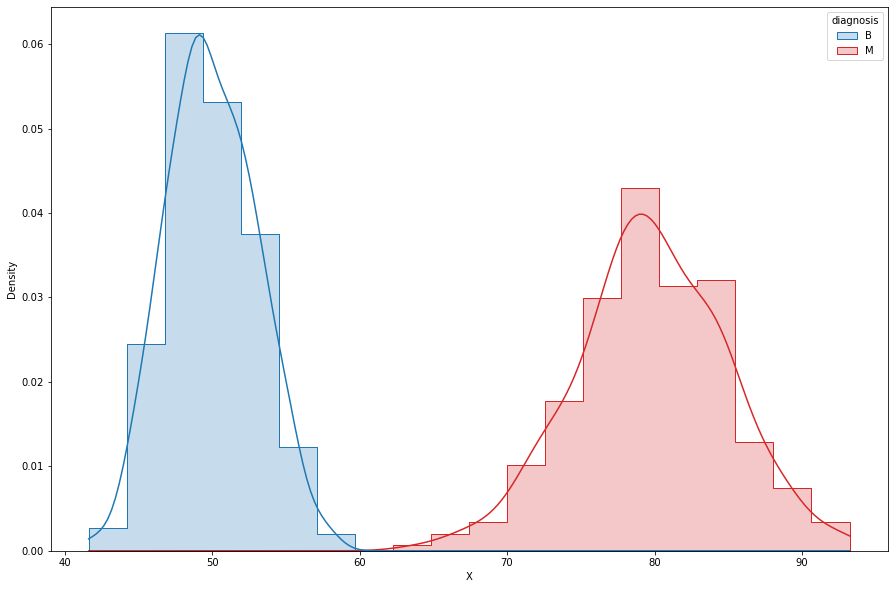

In [15]:
plt.figure(figsize=(15,10))
sns.histplot(data=sample_good_data,x=sample_good_data.columns[0],hue='diagnosis',stat='density',bins=20,kde=True,
             palette=[sns.color_palette()[0],sns.color_palette()[3]],element='step')

### One very peculiar thing to notice about $P(X|Class=Benign)$ and $P(X|Class=Malignant)$ is that both the distributions are not overlapping with each other and hence the data can be classified properly with 100 % accuracy. In other words, it can be said that feature X has strong classification power. 

### Therefore we should always try to select only those features in our dataset for classification which have strong classification power so that we should be able to achieve as much high accuracy as possible. 

### Let's try to plot $P(X|Class = Benign)$ as well as $P(X|Class = Malignant)$ for different features one by one for X equals to different features in the data_columns list. 

In [16]:
def plot_grid_histplot(data,data_columns,shape,figure_size):
    
    data_columns = np.array(data_columns).reshape(shape[0],shape[1])
    fig, axes = plt.subplots(shape[0],shape[1],figsize=figure_size)

    for i in range(data_columns.shape[0]):
        for j in range(data_columns.shape[1]):

            sns.histplot(data=data,x=data_columns[i,j],hue='diagnosis',stat='density',bins=10,kde=True,
                 palette=[sns.color_palette()[3],sns.color_palette()[0]],element='step',ax=axes[i,j])

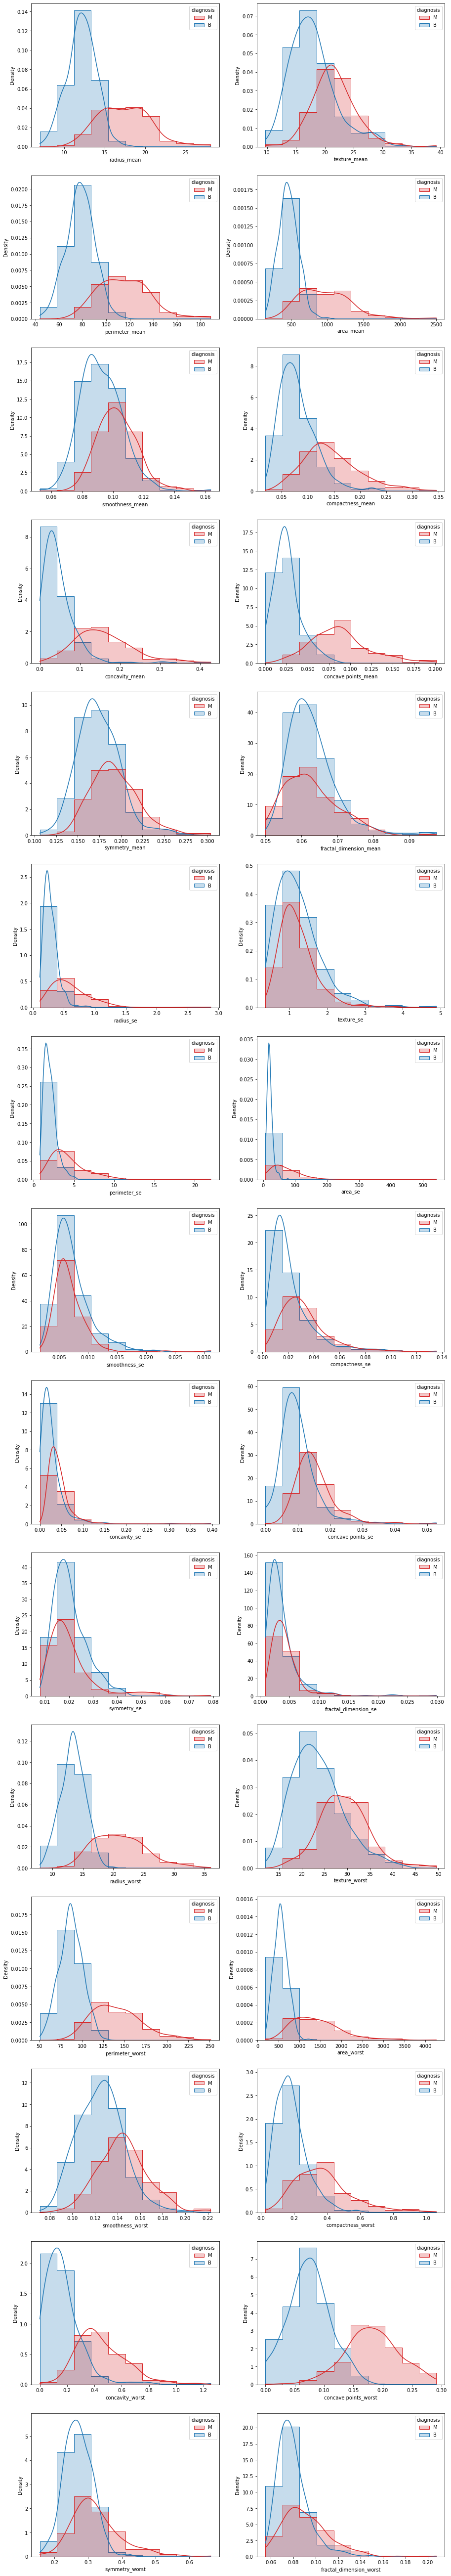

In [17]:
plot_grid_histplot(data,data_columns,shape=(15,2),figure_size=(15,95))

### So, we have to select only those features for which the two probability distributions are overlapping as minimum as possible.

### If seen above then the for the following features, two probability distributions are overlapping as minimum as possible:

### radius_mean
### perimeter_mean
### area_mean
### concavity_mean
### concave_points_mean
### radius_worst
### perimeter_worst
### area_worst

### Let's try to visualize the probability distributions for these individual features:

### Let's try to verify our findings with the help of another plot called heatmap:

In [18]:
data_copy = data.replace(to_replace=['B','M'],value=[0,1],inplace=False)

### Let's first observe the values behind this heatmap. 

In [19]:
corr_df = data_copy.corr()

In [20]:
corr_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


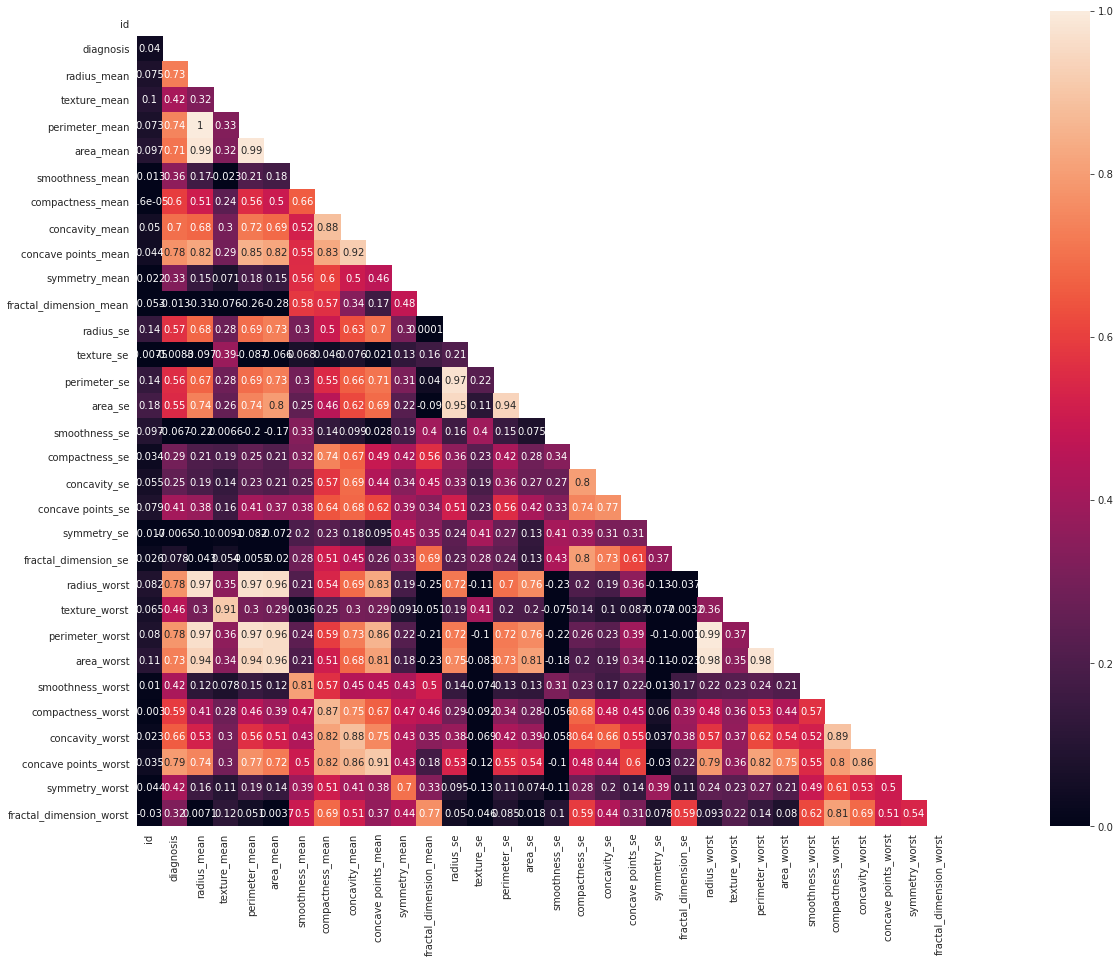

In [21]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sns.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

### The values at each of the cell are given by Pearson Correlation Coefficient. Pearson Correlation Coefficient is computed as: 

### \begin{equation}
r_{X_1,X_2} = \frac{Cov(X_1,X_2)}{\sigma_{X_1}\cdot\sigma_{X_2}}
\end{equation}

### Where $r_{X_1,X_2}$ = Pearson Correlation Coefficient

### $Cov(X_1,X_2)$ = Covariance between features $X_1$ and $X_2$ which is given by: 

### \begin{equation}
Cov(X_1,X_2) = \frac{\sum_{i=1}^{N}(x_1^{i} - \mu_{X_1})\cdot(x_2^{i} - \mu_{X_2})}{N}
\end{equation}

### $\sigma_1$ = Standard Deviation of feature $X_1$
### $\sigma_2$ = Standard Deviation of feature $X_2$

### These values are arranged in the form of a matrix called Pearson Correlation Matrix given as: 

### \begin{bmatrix}
r_{X_1,X_1} & r_{X_1,X_2} & r_{X_1,X_3} & \cdots & r_{X_1,X_n}\\
\vdots & \vdots & \vdots & \cdots & \cdots \\
r_{X_m,X_1} & r_{X_m,X_2} & r_{X_m,X_3} & \cdots & r_{X_m,X_n}\\
r_{X_n,X_1} & r_{X_n,X_2} & r_{X_n,X_3} & \cdots & r_{X_n,X_n}\\
\end{bmatrix}

### One interesting property regarding Pearson Correlation Coefficient is that: 
### \begin{equation}
-1 \leq r_{X_m,X_n} \leq +1
\end{equation}

### Where the value of -1 imples that there is strong negative relationship between features $X_m$ and $X_n$ and on the other hand the value of +1 implies that there is a strong positive relationship between them. Whereas, the value close to 0 irrespective of the sign implies that there is no relationship between the two features. 

### $r_{X_m,X_n}$ is sometimes also called normalized covariance. 

### Darker the color in a cell of the heatmap, weaker the relationship between the two features located at the row and column whose intersection is resulting in that cell position. Brighter the color in a cell, stronger the relationship. 

### If carefully observed then the features which were having a good classification power are also the ones which have high magnitude of pearson correlation coefficient with the 'diagnosis' feature so it can be said that they are the ones on whom the decision of a tumor being classified as Benign or Malignant strongly depends. 

### Let's fetch the features which have strong relationship with 'diagnosis' feature. 

In [22]:
strong_relation_features = pd.Series(corr_df['diagnosis']).nlargest(n=9).iloc[1:]

In [23]:
strong_relation_features

concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
Name: diagnosis, dtype: float64

### It can be observed that most of features fetched here are in common with what we inferred from the probability distribution plots. 

### Therefore, the top eight features will be selected in our dataset and rest of the features will be discarded from our dataset. Now, let's select these top eight features from our dataset along with the 'diagnosis' column and let's observe the heatmap of them once again. 

In [24]:
diagnosis = data_copy['diagnosis']
data_copy = data_copy[list(strong_relation_features.to_dict().keys())]

In [25]:
data_copy['diagnosis'] = diagnosis

In [26]:
data_copy

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,1
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,1
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,1
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,1
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,1
...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,1
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,1
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,1
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,1


### Now, lets have a look on the heatmap of the updated dataframe having top eight features along with the labels (diagnosis)

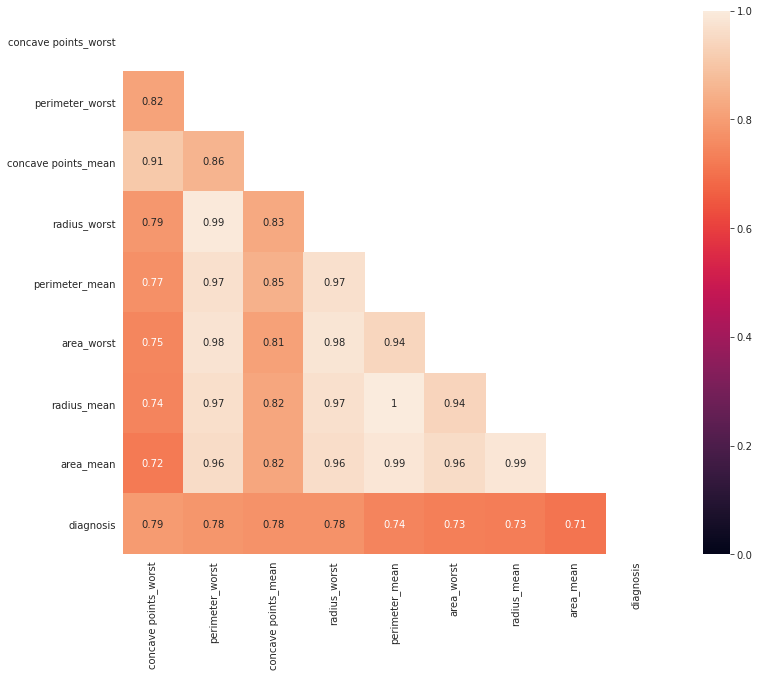

In [27]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13,10))
    sns.heatmap(data=data_copy.corr(),vmin=0,vmax=1,mask=mask,square=True,annot=True)

### Another interesting thing we can observe here is that definitely these top eight features have a good correlation with diagnosis but these top eight features have even higher correlation among themselves also. And if we compute the covariance matrix or correlation matrix in this case then probably, our covariance matrix is going to be singular. Let's try to check that whether the covariance matrix will be singular or not.  

In [28]:
data_copy_cov = np.array(data_copy[list(strong_relation_features.to_dict().keys())].cov())

### Below is the covariance matrix of the data having only top most eight features. 

In [29]:
data_copy_cov

array([[4.32074068e-03, 1.80307085e+00, 2.32144382e-03, 2.50164782e-01,
        1.23184809e+00, 2.79722743e+01, 1.72392739e-01, 1.67017894e+01],
       [1.80307085e+00, 1.12913085e+03, 1.11601611e+00, 1.61387312e+02,
        7.92328208e+02, 1.87028700e+04, 1.14288570e+02, 1.13417898e+04],
       [2.32144382e-03, 1.11601611e+00, 1.50566077e-03, 1.55720694e-01,
        8.02360375e-01, 1.78868809e+01, 1.12475116e-01, 1.12419582e+01],
       [2.50164782e-01, 1.61387312e+02, 1.55720694e-01, 2.33602242e+01,
        1.13858063e+02, 2.70785053e+03, 1.65137495e+01, 1.63752134e+03],
       [1.23184809e+00, 7.92328208e+02, 8.02360375e-01, 1.13858063e+02,
        5.90440480e+02, 1.30261484e+04, 8.54471417e+01, 8.43577235e+03],
       [2.79722743e+01, 1.87028700e+04, 1.78868809e+01, 2.70785053e+03,
        1.30261484e+04, 3.24167385e+05, 1.88822722e+03, 1.92192558e+05],
       [1.72392739e-01, 1.14288570e+02, 1.12475116e-01, 1.65137495e+01,
        8.54471417e+01, 1.88822722e+03, 1.24189201e+01, 1.

In [30]:
data_copy_cov.shape

(8, 8)

#### Let's see whether this matrix is singular or not. So, in order to check whether it is singular or not, we should check it's determinant because the determinant of the singular matrix is always zero. 

In [31]:
data_copy_cov_det = np.linalg.det(data_copy_cov)

In [32]:
data_copy_cov_det

114.1572733104914

### As it can be seen that the covariance matrix is not singular as the determinant of the matrix is coming out to be a non zero value.

In [33]:
data_copy

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,1
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,1
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,1
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,1
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,1
...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,1
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,1
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,1
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,1


### Let's see that how many benign tumors (negative class, 0 class) are there in our data ? 

In [34]:
data_copy[data_copy['diagnosis'] == 0].shape[0]

357

### Let's see that how many malignant tumors (positive class, 1 class) are there in our data ? 

In [35]:
data_copy[data_copy['diagnosis'] == 1].shape[0]

212

### As equal number of both tumors are required for our training data therefore, we will take out 75 % of bening as well as malignant tumors in our training data and put the rest of the tumors inside Cross Validation Data. 

In [36]:
class0_data = data_copy[data_copy['diagnosis'] == 0]
class1_data = data_copy[data_copy['diagnosis'] == 1]

class0_training_data = class0_data.iloc[0:int(0.75*len(class0_data))]
class1_training_data = class1_data.iloc[0:int(0.75*len(class1_data))]

class0_cv_data = class0_data.iloc[int(0.75*len(class0_data)):]
class1_cv_data = class1_data.iloc[int(0.75*len(class1_data)):]

training_data = pd.concat([class0_training_data,class1_training_data])
cv_data = pd.concat([class0_cv_data,class1_cv_data])

In [37]:
training_data

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
19,0.12880,99.70,0.047810,15.110,87.46,711.2,13.540,566.3,0
20,0.07283,96.09,0.031100,14.500,85.63,630.5,13.080,520.0,0
21,0.06227,65.13,0.020760,10.230,60.34,314.9,9.504,273.9,0
37,0.05013,84.46,0.029230,13.300,82.61,545.9,13.030,523.8,0
46,0.02564,57.26,0.005917,8.964,51.71,242.2,8.196,201.9,0
...,...,...,...,...,...,...,...,...,...
335,0.18270,143.20,0.099340,20.990,111.80,1362.0,17.060,918.6,1
337,0.20480,161.10,0.060900,24.540,122.90,1873.0,18.770,1092.0,1
339,0.20890,202.40,0.141000,30.670,155.10,2906.0,23.510,1747.0,1
343,0.22550,157.60,0.110300,22.750,129.90,1540.0,19.680,1194.0,1


In [38]:
cv_data

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,diagnosis
453,0.10690,103.10,0.06495,15.80,93.86,749.9,14.53,644.2,0
454,0.09851,91.62,0.02272,14.34,80.62,633.5,12.62,492.9,0
455,0.07763,96.69,0.03264,15.05,86.34,705.6,13.38,557.2,0
456,0.06835,86.04,0.02017,13.12,74.87,527.8,11.63,415.1,0
457,0.06005,91.29,0.02068,14.35,84.10,632.9,13.21,537.9,0
...,...,...,...,...,...,...,...,...,...
563,0.25420,179.10,0.14740,24.29,143.00,1819.0,20.92,1347.0,1
564,0.22160,166.10,0.13890,25.45,142.00,2027.0,21.56,1479.0,1
565,0.16280,155.00,0.09791,23.69,131.20,1731.0,20.13,1261.0,1
566,0.14180,126.70,0.05302,18.98,108.30,1124.0,16.60,858.1,1


### Now, we will train Naive Bayes Classifier over our training data. 

### So, now the question arrises is that how Naive Bayes Classifier works ? Well, one thing is obvious that Naive Bayes Classifier must be working on Bayes Rule which is given as: 

### \begin{equation}
P(A|B) = \frac{P(B|A)\cdot{P(A)}}{P(B)}
\end{equation}

### Now, let's first ask ourselves this question that how Naive Bayes Classifier works ? 

### Here we are trying to solve a classification problem where we want to classifiy the tumor as either belonging to class 0 (benign) or belonging to class 1 (malignant).  

### So what we are going to do in Naive Bayes Classifier is that first of all we would want to compute this probability: 

### $P(Class=1|$Features of that specific tumor$)$ or $P(Class=1|X_i)$ where $X_i$ is the feature vector which will be one or eight dimensional according to our dataset, given as: 

#### \begin{equation}
X_i = 
\begin{bmatrix}
x_{i1}\\
x_{i2}\\
x_{i3}\\
x_{i4}\\
x_{i5}\\
x_{i6}\\
x_{i7}\\
x_{i8}
\end{bmatrix}
\end{equation}

### And if $P(Class=1|X_i) > 0.5$ then the classifier will classify the tumor as Malignant (belonging to class 1) otherwise, it will classify the tumor as Benign (belonging to class 0). 

### So, folks thats Naive bayes Classifier in a nutshell !!!

### But now the question arrises is that how we are going to compute $P(Class=1|X_i)$ for a specific tumor for which we want to perform classification. 

### The answer to the above question is pretty simple. Let's say that $P(Class=1|X_i)$ is same as $P(A|B)$ in our Bayes Rule. So, if we rewrite Bayes Rule now in context of our classification problem then it will be given as: 

### $P(Class=1|X_i) = \frac{P(X_i|Class=1)\cdot{P(Class=1)}}{P(X_i)}$

### As can be clearly seen that in order to compute $P(Class=1|X_i)$, the three probabilities on the Right Hand Side of the equation need to be computed. 

### Before proceeding further, let's first try to know and understand what these four probabilities are in Bayes Rule:

### $P(Class=1|X_i)$ is POSTERIOR PROBABILITY
### $P(X_i|Class=1)$ is LIKELIHOOD
### $P(Class=1)$ is PRIOR
### $P(X_i)$ is NORMALIZING PROBABILITY or somtimes called EVIDENCE

### Let's first talk about the most easy probability to compute in Bayes Rule and that is $P(Class=1)$ and it is just the relative frequency of Class 1 tumors in the training data. Therefore,
### $P(Class=1) = \frac{\text{Number of Class 1 Tumors in Training Data}}{\text{Total Number of Tumors in Training Data}}$
### \begin{equation}
P(Class=1) = \frac{213}{426} = 0.5
\end{equation}

### Now, let's compute the Likelihood $P(X_i|Class=1)$. Here, we can have two cases: 
### 1. $X_i$ is single dimensional
### As we can observe that all the eight features of any tumor are dense and not sparse (that is continuous and not discrete) and if we consider $X_i$ to be single dimensional (any one of these eight features) then the probability of occurence can be computed using the PDF (Probability Density Function) of Univariate Gaussian Distribution. Hence, the likelihood, $P(X_i|Class=1)$ is given as: 
### \begin{equation}
P(X_i|Class=1) = \frac{1}{\sqrt{2\pi}\cdot\sigma_1}\cdot{e}^{-\frac{(X_i-\mu_1)^2}{2\cdot{\sigma_1^2}}}
\end{equation}

### As can be seen that there are two parameters present in the Univariate Gaussian Distribution namely, $\mu_1$ and $\sigma_1$. If the selected univariate feature is radius_worst for all the Class 1 tumors, that is Malignant tumors, then $P(X|Class=1)$ can be visualized as: 

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_worst', ylabel='Density'>

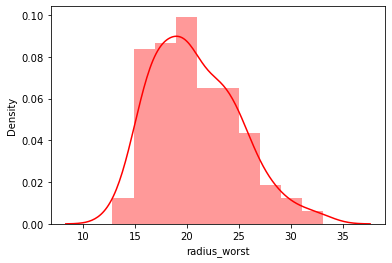

In [39]:
sns.distplot(a=training_data[training_data['diagnosis'] == 1]['radius_worst'],color='r')

### Where, the mean $(\mu_1)$ and standard deviation $(\sigma_1)$ will be:  

In [40]:
mu_1 = np.mean(training_data[training_data['diagnosis'] == 1]['radius_worst'])
sigma_1 = np.std(training_data[training_data['diagnosis'] == 1]['radius_worst'])
print(mu_1)
print(sigma_1)

20.794779874213837
4.108698218678705


### $\mu_1 = 20.794$ and $\sigma_1 = 4.108$

### Similarly, $P(X_i|Class=0)$ is given as: 
### \begin{equation}
P(X_i|Class=0) = \frac{1}{\sqrt{2\pi}\cdot\sigma_0}\cdot{e}^{-\frac{(X_i-\mu_0)^2}{2\cdot{\sigma_0^2}}}
\end{equation}
### The likelihood, $P(X_i|Class=0)$ can be visualized as: 

C:\Users\Public\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radius_worst', ylabel='Density'>

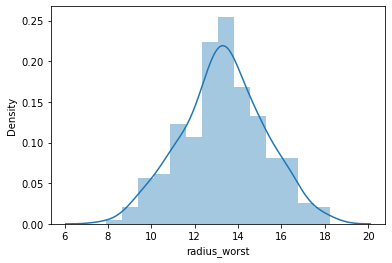

In [41]:
sns.distplot(a=training_data[training_data['diagnosis'] == 0]['radius_worst'])

### Where, the mean $(\mu_0)$ and standard deviation $(\sigma_0)$ will be:  

In [42]:
mu_0 = np.mean(training_data[training_data['diagnosis'] == 0]['radius_worst'])
sigma_0 = np.std(training_data[training_data['diagnosis'] == 0]['radius_worst'])
print(mu_0)
print(sigma_0)

13.315318352059935
1.9037709571935026


### $\mu_0 = 13.315$ and $\sigma_0 = 1.903$

### 2. $X_i$ is multidimensional
### Now, if $X_i$ is multidimensional as in eight dimensional then the likelihood, $P(X_i|Class=1)$ can be further written as:  
### $P(x_{i1}\cap x_{i2} \cap x_{i3} \cap x_{i4} \cap x_{i5} \cap x_{i6} \cap x_{i7} \cap x_{i8}|Class=1)$
### As we can observe that all the eight features of any tumor are dense and not sparse (that is continuous and not discrete) and hence the joint probability of their occurence can be computed using the PDF (Probability Density Function) of Gaussian Distribution and it will be specifically Multivariate Gaussian Distribution because there are eight variables (multivariate).

### Therefore, the likelihood, $P(X_i|Class=1)$ is given as:
$\newcommand{\multigaussianpdf}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\ \vdots\\x^i_n-\mu^#1_n \end{array}\right]^T\sum_#1^{-1}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2 \\ \vdots\\x^i_n-\mu^#1_n\end{array}\right]}}}$
#### $P(X_i|1) = \multigaussianpdf{1}$

### This is the PDF of generic n-dimensional Multivariate Gaussian Distribution for computing the probability of occurence of n dimensional vector observation $X_i$ on a condition that the tumor belongs to Class 1 or Malignant category. The parameters of this distribution are n-dimensional mean vector, given as: 

#### \begin{equation}
{\huge \vec{\mu_1}} = 
\begin{bmatrix}
\mu^1_1\\
\mu^1_2\\
\vdots\\
\mu^1_n
\end{bmatrix}
\end{equation}

### and (n,n) Covariance Matrix $\sum_{1}$ given as: 
#### \begin{equation}
\sum_{1} = 
\begin{bmatrix}
Cov(X^1_1,X^1_1) & Cov(X^1_1,X^1_2) & Cov(X^1_1,X^1_3) & \cdots & Cov(X^1_1,X^1_n)\\
\vdots & \vdots & \vdots & \cdots & \cdots \\
Cov(X^1_m,X^1_1) & Cov(X^1_m,X^1_2) & Cov(X^1_m,X^1_3) & \cdots & Cov(X^1_m,X^1_n)\\
Cov(X^1_n,X^1_1) & Cov(X^1_n,X^1_2) & Cov(X^1_n,X^1_3) & \cdots & Cov(X^1_n,X^1_n)\\
\end{bmatrix}
\end{equation}

### Therefore the above PDF can be rewritten as: 
$\newcommand{\multigaussianpdfconsise}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
### $P(X_i|1) = \multigaussianpdfconsise{1}$

### But in our case, n=8 therefore, the above PDF is going to look like: 
$\newcommand{\multigaussianpdfconsiseeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|1) = \multigaussianpdfconsiseeight{1}$

### Where,
#### \begin{equation}
{\huge \vec{\mu_1}} = 
\begin{bmatrix}
\mu^1_1\\
\mu^1_2\\
\mu^1_3\\
\mu^1_4\\
\mu^1_5\\
\mu^1_6\\
\mu^1_7\\
\mu^1_8
\end{bmatrix}
\end{equation}
### and (8,8) Covariance Matrix $\sum_{1}$ given as:
#### \begin{equation}
{\tiny
\sum_{1} = 
\begin{bmatrix}
Cov(X^1_1,X^1_1) &  Cov(X^1_1,X^1_2) & Cov(X^1_1,X^1_3) & Cov(X^1_1,X^1_4) & Cov(X^1_1,X^1_5) & Cov(X^1_1,X^1_6) & Cov(X^1_1,X^1_7) Cov(X^1_1,X^1_8)\\
Cov(X^1_2,X^1_1) & Cov(X^1_2,X^1_2) & Cov(X^1_2,X^1_3) & Cov(X^1_2,X^1_4) & Cov(X^1_2,X^1_5) & Cov(X^1_2,X^1_6) & Cov(X^1_2,X^1_7) Cov(X^1_2,X^1_8)\\
Cov(X^1_3,X^1_1) & Cov(X^1_3,X^1_2) & Cov(X^1_3,X^1_3) & Cov(X^1_3,X^1_4) & Cov(X^1_3,X^1_5) & Cov(X^1_3,X^1_6) & Cov(X^1_3,X^1_7) Cov(X^1_3,X^1_8)\\
Cov(X^1_4,X^1_1) & Cov(X^1_4,X^1_2) & Cov(X^1_4,X^1_3) & Cov(X^1_4,X^1_4) & Cov(X^1_4,X^1_5) & Cov(X^1_4,X^1_6) & Cov(X^1_4,X^1_7) Cov(X^1_4,X^1_8)\\
Cov(X^1_5,X^1_1) & Cov(X^1_5,X^1_2) & Cov(X^1_5,X^1_3) & Cov(X^1_5,X^1_4) & Cov(X^1_5,X^1_5) & Cov(X^1_5,X^1_6) & Cov(X^1_5,X^1_7) Cov(X^1_5,X^1_8)\\
Cov(X^1_6,X^1_1) & Cov(X^1_6,X^1_2) & Cov(X^1_6,X^1_3) & Cov(X^1_6,X^1_4) & Cov(X^1_6,X^1_5) & Cov(X^1_6,X^1_6) & Cov(X^1_6,X^1_7) Cov(X^1_6,X^1_8)\\
Cov(X^1_7,X^1_1) & Cov(X^1_7,X^1_2) & Cov(X^1_7,X^1_3) & Cov(X^1_7,X^1_4) & Cov(X^1_7,X^1_5) & Cov(X^1_7,X^1_6) & Cov(X^1_7,X^1_7) Cov(X^1_7,X^1_8)\\
Cov(X^1_8,X^1_1) & Cov(X^1_8,X^1_2) & Cov(X^1_8,X^1_3) & Cov(X^1_8,X^1_4) & Cov(X^1_8,X^1_5) & Cov(X^1_8,X^1_6) & Cov(X^1_8,X^1_7) Cov(X^1_8,X^1_8)\\
\end{bmatrix}
}
\end{equation}
### and if it is written in expanded form then it is going to look like: 
$\newcommand{\multigaussianpdfeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\x^i_3-\mu^#1_3\\x^i_4-\mu^#1_4\\x^i_5-\mu^#1_5\\x^i_6-\mu^#1_6\\x^i_7-\mu^#1_7\\x^i_8-\mu^#1_8\end{array}\right]^T\sum_#1^{-1}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\x^i_3-\mu^#1_3\\x^i_4-\mu^#1_4\\x^i_5-\mu^#1_5\\x^i_6-\mu^#1_6\\x^i_7-\mu^#1_7\\x^i_8-\mu^#1_8\end{array}\right]}}}$
#### $P(X_i|1) = \multigaussianpdfeight{1}$

### Similarly in the case of Class 0 tumors, the likelihood, $P(X_i|Class=0)$ can be defined as: 

$\newcommand{\multigaussianpdf}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\ \vdots\\x^i_n-\mu^#1_n \end{array}\right]^T\sum_#1^{-1}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2 \\ \vdots\\x^i_n-\mu^#1_n\end{array}\right]}}}$
#### $P(X_i|0) = \multigaussianpdf{0}$

### This is the PDF of generic n-dimensional Multivariate Gaussian Distribution for computing the probability of occurence of n dimensional vector observation $X_i$ on a condition that the tumor belongs to Class 0 or Benign category. The parameters of this distribution are n-dimensional mean vector, given as: 

#### \begin{equation}
{\huge \vec{\mu_0}} = 
\begin{bmatrix}
\mu^0_1\\
\mu^0_2\\
\vdots\\
\mu^0_n
\end{bmatrix}
\end{equation}

### and (n,n) Covariance Matrix $\sum_{0}$ given as: 
#### \begin{equation}
\sum_{0} = 
\begin{bmatrix}
Cov(X^0_1,X^0_1) & Cov(X^0_1,X^0_2) & Cov(X^0_1,X^0_3) & \cdots & Cov(X^0_1,X^0_n)\\
\vdots & \vdots & \vdots & \cdots & \cdots \\
Cov(X^0_m,X^0_1) & Cov(X^0_m,X^0_2) & Cov(X^0_m,X^0_3) & \cdots & Cov(X^0_m,X^0_n)\\
Cov(X^0_n,X^0_1) & Cov(X^0_n,X^0_2) & Cov(X^0_n,X^0_3) & \cdots & Cov(X^0_n,X^0_n)\\
\end{bmatrix}
\end{equation}

### Therefore the above PDF can be rewritten as: 
$\newcommand{\multigaussianpdfconsise}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|0) = \multigaussianpdfconsise{0}$

### But in our case, n=8 therefore, the above PDF is going to look like: 
$\newcommand{\multigaussianpdfconsiseeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|0) = \multigaussianpdfconsiseeight{0}$

### Where,
#### \begin{equation}
{\huge \vec{\mu_0}} = 
\begin{bmatrix}
\mu^0_1\\
\mu^0_2\\
\mu^0_3\\
\mu^0_4\\
\mu^0_5\\
\mu^0_6\\
\mu^0_7\\
\mu^0_8
\end{bmatrix}
\end{equation}

### and (8,8) Covariance Matrix $\sum_{0}$ given as:
#### \begin{equation}
{\tiny
\sum_{0} = 
\begin{bmatrix}
Cov(X^0_1,X^1_1) &  Cov(X^0_1,X^1_2) & Cov(X^0_1,X^1_3) & Cov(X^0_1,X^1_4) & Cov(X^0_1,X^1_5) & Cov(X^0_1,X^1_6) & Cov(X^0_1,X^1_7) Cov(X^0_1,X^1_8)\\
Cov(X^0_2,X^1_1) & Cov(X^0_2,X^1_2) & Cov(X^0_2,X^1_3) & Cov(X^0_2,X^1_4) & Cov(X^0_2,X^1_5) & Cov(X^0_2,X^1_6) & Cov(X^0_2,X^1_7) Cov(X^0_2,X^1_8)\\
Cov(X^0_3,X^1_1) & Cov(X^0_3,X^1_2) & Cov(X^0_3,X^1_3) & Cov(X^0_3,X^1_4) & Cov(X^0_3,X^1_5) & Cov(X^0_3,X^1_6) & Cov(X^0_3,X^1_7) Cov(X^0_3,X^1_8)\\
Cov(X^0_4,X^1_1) & Cov(X^0_4,X^1_2) & Cov(X^0_4,X^1_3) & Cov(X^0_4,X^1_4) & Cov(X^0_4,X^1_5) & Cov(X^0_4,X^1_6) & Cov(X^0_4,X^1_7) Cov(X^0_4,X^1_8)\\
Cov(X^0_5,X^1_1) & Cov(X^0_5,X^1_2) & Cov(X^0_5,X^1_3) & Cov(X^0_5,X^1_4) & Cov(X^0_5,X^1_5) & Cov(X^0_5,X^1_6) & Cov(X^0_5,X^1_7) Cov(X^0_5,X^1_8)\\
Cov(X^0_6,X^1_1) & Cov(X^0_6,X^1_2) & Cov(X^0_6,X^1_3) & Cov(X^0_6,X^1_4) & Cov(X^0_6,X^1_5) & Cov(X^0_6,X^1_6) & Cov(X^0_6,X^1_7) Cov(X^0_6,X^1_8)\\
Cov(X^0_7,X^1_1) & Cov(X^0_7,X^1_2) & Cov(X^0_7,X^1_3) & Cov(X^0_7,X^1_4) & Cov(X^0_7,X^1_5) & Cov(X^0_7,X^1_6) & Cov(X^0_7,X^1_7) Cov(X^0_7,X^1_8)\\
Cov(X^0_8,X^1_1) & Cov(X^0_8,X^1_2) & Cov(X^0_8,X^1_3) & Cov(X^0_8,X^1_4) & Cov(X^0_8,X^1_5) & Cov(X^0_8,X^1_6) & Cov(X^0_8,X^1_7) Cov(X^0_8,X^1_8)\\
\end{bmatrix}
}
\end{equation}
### and if it is written in expanded form then it is going to look like: 
$\newcommand{\multigaussianpdfeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\x^i_3-\mu^#1_3\\x^i_4-\mu^#1_4\\x^i_5-\mu^#1_5\\x^i_6-\mu^#1_6\\x^i_7-\mu^#1_7\\x^i_8-\mu^#1_8\end{array}\right]^T\sum_#1^{-1}\left[\begin{array}{c}x^i_1-\mu^#1_1\\x^i_2-\mu^#1_2\\x^i_3-\mu^#1_3\\x^i_4-\mu^#1_4\\x^i_5-\mu^#1_5\\x^i_6-\mu^#1_6\\x^i_7-\mu^#1_7\\x^i_8-\mu^#1_8\end{array}\right]}}}$
#### $P(X_i|0) = \multigaussianpdfeight{0}$

### Now the question arrises is that how a multivariate gaussian distribution is going to look like and what do the parameters of multivariate gaussian distribution, $(\vec{\mu},\sum)$ actually mean. 
### In order to know the answer to this question, we have to limit ourselves to the case of only two random variables for time being. Therefore, instead of eight random variables, let's now have a look on the conditional likelihoods, $P(X_i|Class=1)$ and $P(X_i|Class=0)$ for the case of two random variables:

$\newcommand{\multigaussianpdfconsise}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|1) = \multigaussianpdfconsise{1}$
### Where now, 
#### \begin{equation}
X_i = 
\begin{bmatrix}
x_{i1}\\
x_{i2}
\end{bmatrix}
\end{equation}

#### \begin{equation}
{\huge \vec{\mu_1}} = 
\begin{bmatrix}
\mu^1_1\\
\mu^1_2
\end{bmatrix}
\end{equation}

### and (2,2) Covariance Matrix $\sum_{1}$ given as:
#### \begin{equation}
\sum_{1} = 
\begin{bmatrix}
Cov(X^1_1,X^1_1) &  Cov(X^1_1,X^1_2)\\
Cov(X^1_2,X^1_1) & Cov(X^1_2,X^1_2)
\end{bmatrix}
\end{equation}

$\newcommand{\multigaussianpdfconsise}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^n\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|0) = \multigaussianpdfconsise{0}$
### Where now, 
#### \begin{equation}
X_i = 
\begin{bmatrix}
x_{i1}\\
x_{i2}
\end{bmatrix}
\end{equation}

#### \begin{equation}
{\huge \vec{\mu_0}} = 
\begin{bmatrix}
\mu^0_1\\
\mu^0_2
\end{bmatrix}
\end{equation}

### and (2,2) Covariance Matrix $\sum_{0}$ given as:
#### \begin{equation}
\sum_{0} = 
\begin{bmatrix}
Cov(X^0_1,X^0_1) &  Cov(X^0_1,X^0_2)\\
Cov(X^0_2,X^0_1) & Cov(X^0_2,X^0_2)
\end{bmatrix}
\end{equation}

### If we select two features namely radius_worst and perimeter_worst from the eight features: 

In [43]:
bivariate_training_data = training_data[['radius_worst','perimeter_worst','diagnosis']]

In [44]:
bivariate_training_data

,radius_worst,perimeter_worst,diagnosis
19,15.110,99.70,0
20,14.500,96.09,0
21,10.230,65.13,0
37,13.300,84.46,0
46,8.964,57.26,0
...,...,...,...
335,20.990,143.20,1
337,24.540,161.10,1
339,30.670,202.40,1
343,22.750,157.60,1


### Then the mean vector and covariance matrix for both conditional likelihoods, $P(X_i|Class=1)$ and $P(X_i|Class=0)$ will be given as: 

In [45]:
mu_1 = np.array(bivariate_training_data[bivariate_training_data['diagnosis'] == 1].iloc[:,0:2].mean())
cov_1 = np.array(bivariate_training_data[bivariate_training_data['diagnosis'] == 1].iloc[:,0:2].cov())
print(mu_1)
print(cov_1)

[ 20.79477987 138.80786164]
[[ 16.98824536 114.11245522]
 [114.11245522 793.26896249]]


#### \begin{equation}
{\huge \vec{\mu_1}} =
\begin{bmatrix}
\mu^1_1\\
\mu^1_2
\end{bmatrix} =
\begin{bmatrix}
20.794\\
138.807
\end{bmatrix}
\end{equation}

#### \begin{equation}
\sum_{1} =
\begin{bmatrix}
Cov(X^1_1,X^1_1) &  Cov(X^1_1,X^1_2)\\
Cov(X^1_2,X^1_1) & Cov(X^1_2,X^1_2)
\end{bmatrix} =
\begin{bmatrix}
16.988 &  114.112\\
114.112 & 793.268
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{X^1_1}^2 &  Cov(X^1_1,X^1_2)\\
Cov(X^1_2,X^1_1) & \sigma_{X^1_2}^2
\end{bmatrix}
\end{equation}

In [46]:
mu_0 = np.array(bivariate_training_data[bivariate_training_data['diagnosis'] == 0].iloc[:,0:2].mean())
cov_0 = np.array(bivariate_training_data[bivariate_training_data['diagnosis'] == 0].iloc[:,0:2].cov())
print(mu_0)
print(cov_0)

[13.31531835 86.52857678]
[[  3.63796921  24.42416519]
 [ 24.42416519 168.92367391]]


#### \begin{equation}
{\huge \vec{\mu_0}} = 
\begin{bmatrix}
\mu^0_1\\
\mu^0_2
\end{bmatrix} =
\begin{bmatrix}
13.315\\
86.528
\end{bmatrix}
\end{equation}

#### \begin{equation}
\sum_{0} = 
\begin{bmatrix}
Cov(X^0_1,X^0_1) &  Cov(X^0_1,X^0_2)\\
Cov(X^0_2,X^0_1) & Cov(X^0_2,X^0_2)
\end{bmatrix} =
\begin{bmatrix}
3.63 &  24.42\\
24.42 & 168.92
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{X^0_1}^2 &  Cov(X^0_1,X^0_2)\\
Cov(X^0_2,X^0_1) & \sigma_{X^0_2}^2
\end{bmatrix}
\end{equation}

### Now, let's plot the bivariate gaussian distribution of the conditional likelihood, $P(X|Class=1)$ but before plotting this, let's try to visualize that how a typical bivariate gaussian distribution looks like: 

In [47]:
def multivariate_gaussian_plot(mean_vec,cov_mat,X1_min,X1_max,X2_min,X2_max,p_min=0,p_max=0.2):
    X_1 = np.linspace(X1_min,X1_max,300)
    X_2 = np.linspace(X2_min,X2_max,300)
    X_1,X_2 = np.meshgrid(X_1,X_2)

    data = np.empty(X_1.shape+(2,))

    data[:,:,0] = X_1
    data[:,:,1] = X_2

    P_X_equals_x_and_Y_equals_y = s.multivariate_normal.pdf(data,mean=mean_vec,cov=cov_mat)

    fig = plt.figure(figsize=(12,12))
    axes = fig.gca(projection='3d')

    axes.plot_surface(X=X_1,Y=X_2,Z=P_X_equals_x_and_Y_equals_y,rstride=3,
                      cstride=3,linewidth=1,antialiased=True,cmap=cm.viridis)
    axes.contourf(X=X_1,Y=X_2,Z=P_X_equals_x_and_Y_equals_y,zdir='z',cmap=cm.viridis,offset=-0.15)
    axes.set_zlim(-0.15,p_max)

    axes.set_zticks(np.linspace(0,p_max,5))
    axes.view_init(27,-21)
    plt.show()

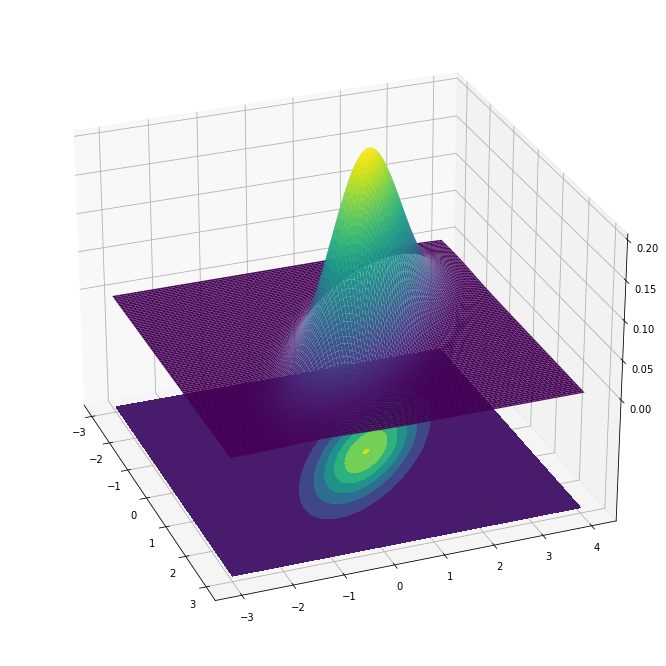

In [48]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[1,-0.75],[-0.75,1]]),-3,3,-3,4)

### The Covariance matrix for the above Bivariate Gaussian Distribution is: 
#### \begin{equation}
\sum = 
\begin{bmatrix}
1 &  -0.75\\
-0.75 & 1
\end{bmatrix} 
\end{equation}

### Let's change the covariance matrix of the above distribution to: 
#### \begin{equation}
\sum = 
\begin{bmatrix}
1 &  0.75\\
0.75 & 1
\end{bmatrix} 
\end{equation}
### while keeping the mean vector $(\vec{\mu})$ same. 

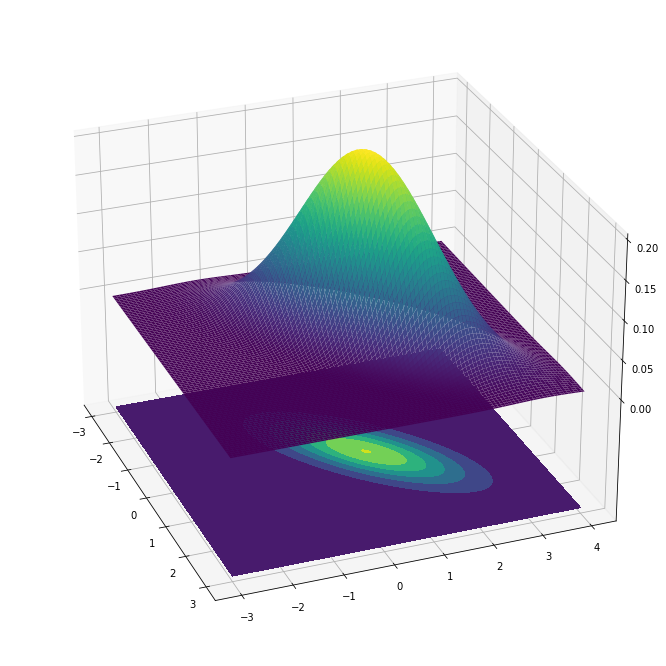

In [49]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[1,0.75],[0.75,1]]),-3,3,-3,4)

### It can be clearly observed that change in the sign of upper and lower triangle elements changes the orientation of distribution. 

### Let's again change the covariance matrix of the distribution to:
#### \begin{equation}
\sum = 
\begin{bmatrix}
1 &  0\\
0 & 1
\end{bmatrix} 
\end{equation}
### while keeping the mean vector $(\vec{\mu})$ same. 

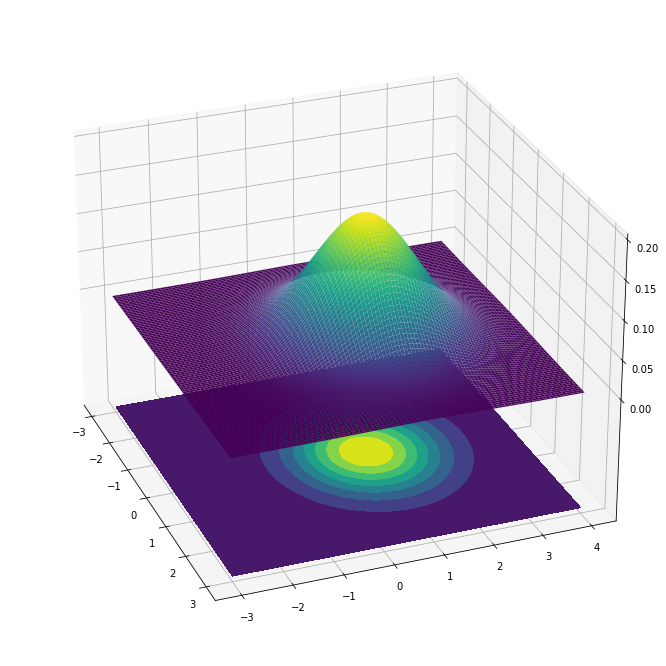

In [50]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[1,0],[0,1]]),-3,3,-3,4)

### As can be seen now that the distribution has become circular now, before it was elliptical. 

### Let's again change the covariance matrix of the distribution to:
#### \begin{equation}
\sum = 
\begin{bmatrix}
10 &  0\\
0 & 1
\end{bmatrix} 
\end{equation}
### while keeping the mean vector $(\vec{\mu})$ same. 

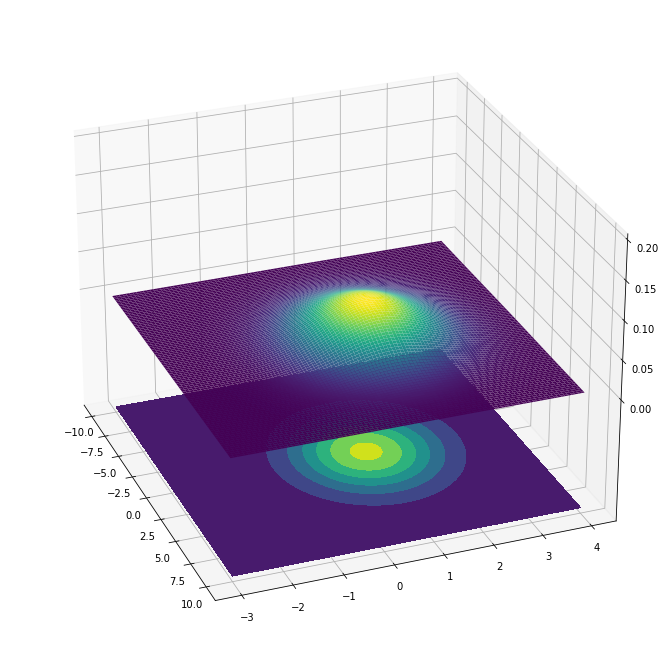

In [51]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[10,0],[0,1]]),-10,10,-3,4)

### As it can be clearly observed that increasing/decreasing the values present in the diagonals of covariance matrix increases/decreases the spread of the distribution. Therefore, the diagonal of covariance matrix consists of variance of each feature.  Let's try reducing the variance of the features to even less than 1 and again keeping the mean vector $(\vec{\mu})$ to be same.  

### Let's change the covariance matrix to:
#### \begin{equation}
\sum = 
\begin{bmatrix}
0.4 &  0\\
0 & 0.4
\end{bmatrix} 
\end{equation}

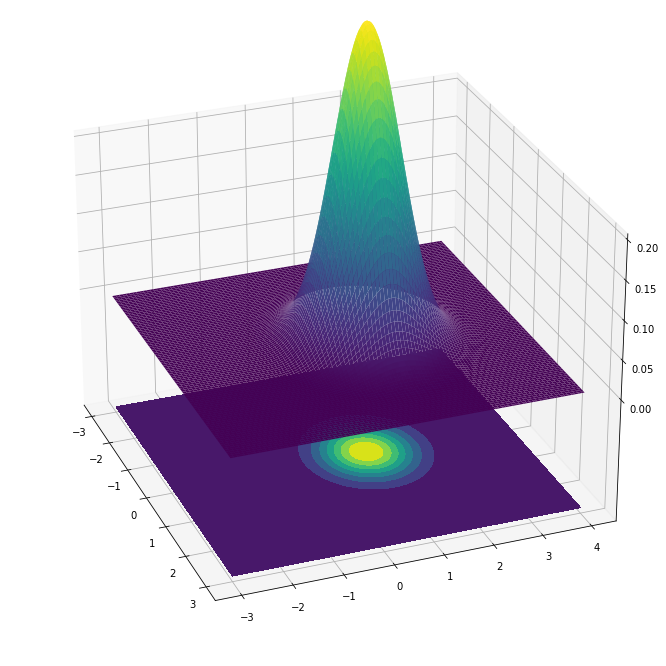

In [52]:
multivariate_gaussian_plot(np.array([0,1]),np.array([[0.4,0],[0,0.4]]),-3,3,-3,4)

### As can be clearly observed that the spread of the distribution has been reduced drastically. 

### Let's now finally change the mean vector while keeping the covariance matrix constant. Let's change the mean vector, $(\vec{\mu})$ to:

#### \begin{equation}
{\huge \vec{\mu}} =
\begin{bmatrix}
\mu_1\\
\mu_2
\end{bmatrix} =
\begin{bmatrix}
5\\
4
\end{bmatrix}
\end{equation}
### and plot the distribution. 

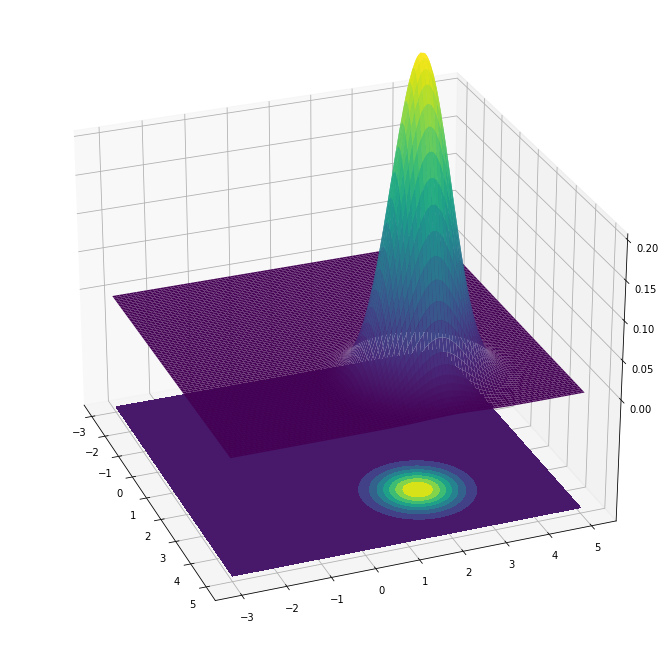

In [53]:
multivariate_gaussian_plot(np.array([3,2]),np.array([[0.4,0],[0,0.4]]),-3,5,-3,5)

### As can be clearly observed that change in mean vector changes the center of the distribution and hence it moves the whole distribution and changes it's position. Therefore, mean vector $(\vec{\mu})$ controls the position of distribution and $\sum$ controls the spread and shape of the distribution, where upper and lower triangle elements (Covariances) controls the shape (either Circular or Elliptical) and orientation of elliptical shape and diagonal elements (Variances) controls the spread of the distribution. 

### Now, let's see how our conditional likelihood distributions look like. 

### The plot of $P(X|Class=1)$:

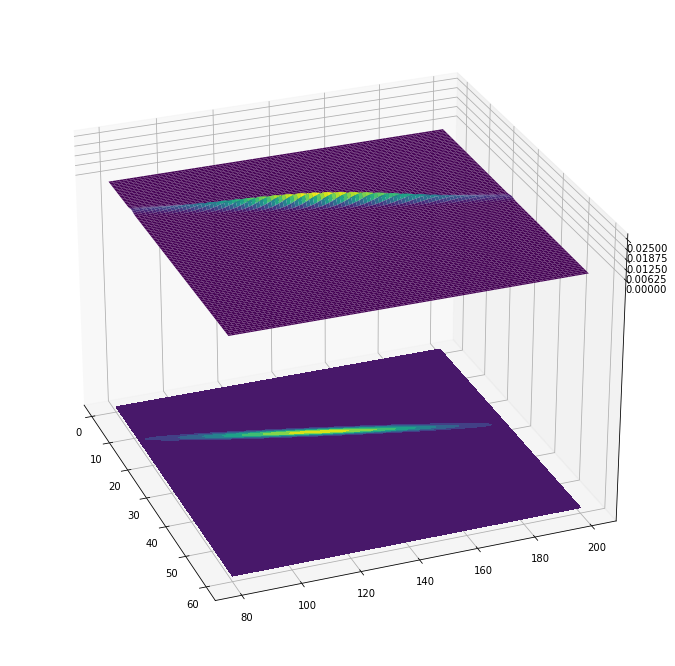

In [54]:
multivariate_gaussian_plot(mu_1,cov_1,0,60,80,200,0,0.025)

### Now, we can clearly understand that what is going on with this distribution. 

### Now, let's plot the bivariate gaussian distribution of the conditional likelihood, $P(X|Class=0)$

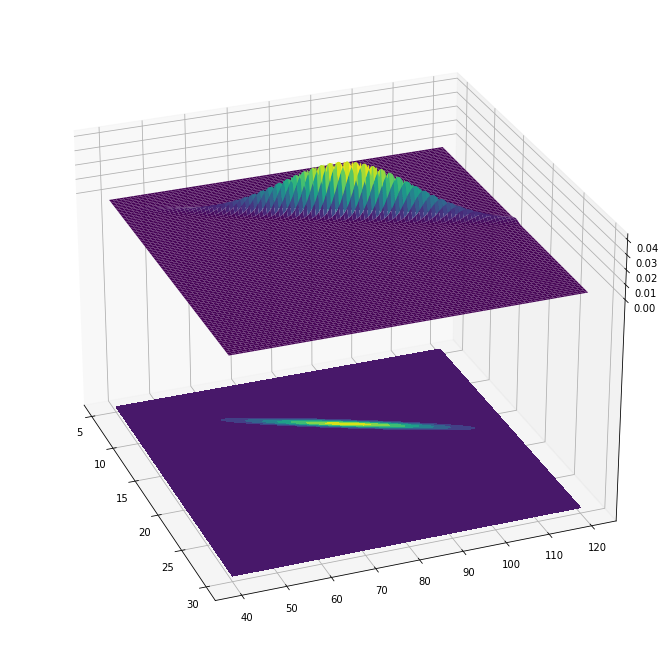

In [55]:
multivariate_gaussian_plot(mu_0,cov_0,5,30,40,120,0,0.04)

### So, this concept can also be further extended to the case of eight dimensional gaussian distributions which are our actual conditional likelihoods, $P(X|Class=1)$ and $P(X|Class=0)$.  

### So, now let's train our model (Naive Bayes Classifier) from scratch on training data consisting of eight features, for performing classification of tumors as either Benign or Malignant. 

### Let's first compute the Maximum Likelihood Estimates of parameters of both conditional likelihoods, $P(X|Class=1)$ and $P(X|Class=0)$

### Let's compute Maximum Likelihood Estimates of: 
#### $(\vec{\mu_1},\sum_1)$

In [56]:
mu_1 = np.array(training_data[training_data['diagnosis'] == 1].iloc[:,0:8].mean())
sigma_1 = np.array(training_data[training_data['diagnosis'] == 1].iloc[:,0:8].cov())

### Let's compute Maximum Likelihood Estimates of:
#### $(\vec{\mu_0},\sum_0)$

In [57]:
mu_0 = np.array(training_data[training_data['diagnosis'] == 0].iloc[:,0:8].mean())
sigma_0 = np.array(training_data[training_data['diagnosis'] == 0].iloc[:,0:8].cov())

### Now, let's compute $P(Class=1|X_i)$ with the help of Bayes Rule. For this, we are going to define a function called:
### predict_classes( )
### In this function, we will be implementing two functions: 
### 1. s.multivariate_normal.pdf(x,mu_1,sigma_1) : This function will implement the PDF of multivariate normal distribution with $(\vec{\mu_1},\sum_1)$:
$\newcommand{\multigaussianpdfconsiseeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|1) = \multigaussianpdfconsiseeight{1}$
### 2. s.multivariate_normal.pdf(x,mu_0,sigma_0) : This function will implement the PDF of multivariate normal distribution with $(\vec{\mu_0},\sum_0)$:
$\newcommand{\multigaussianpdfconsiseeight}[1]{\frac{1}{\left(\sqrt{2\pi}\right)^8\cdot|\sum_#1|^{\frac{1}{2}}}\cdot{\huge e}^{^{-\frac{1}{2}\left(X_i - \vec{\mu_#1}\right)^T\sum_#1^{-1}\left(X_i - \vec{\mu_#1}\right)}}}$
#### $P(X_i|0) = \multigaussianpdfconsiseeight{0}$

In [60]:
def predict_classes(data):
    
    p_xi_on_class1 = s.multivariate_normal.pdf(data,mu_1,sigma_1)
    
    p_xi_on_class0 = s.multivariate_normal.pdf(data,mu_0,sigma_0)
    
    p_class1_on_xi = p_xi_on_class1/(p_xi_on_class0 + p_xi_on_class1)
    
    return p_class1_on_xi > 0.5

In [61]:
predicted_classes = predict_classes(cv_data.iloc[:,0:8])

In [62]:
predicted_classes

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

### After training Naive Bayes Classifier, we are getting predicted categories where False means that we are getting the predicted category as "Benign" or Class 0 and True means that we are getting predicted category as "Malignant" or Class 1. 

### Now, let's see the performance of our trained model in the form of confusion matrix. 

In [63]:
confusion_matrix(y_true=cv_data['diagnosis'],y_pred=predicted_classes)

array([[86,  4],
       [ 3, 50]], dtype=int64)

### Looking at the confusion matrix, it can be said that the number of True Positives (Tumors that were actually Malignant as well as classified as Malignant) are 86, the number of False Negatives (Tumors that were actually Malignant but classified as Benign) are 4, the number of False Positives (Tumors that were actually Benign but classified as Malignant) are 3 and the number of True Negatives (Tumors that were actually Benign as well as classified as Benign) are 50. Now, looking at these numbers, it looks like our model is performing very well in terms of performance metrics such as Precision, Recall, Accuracy, F1 Score. Let's try to have a look on the performance metrics now.  

In [64]:
print(classification_report(y_true=cv_data['diagnosis'],y_pred=predicted_classes))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143



### As, it can be seen that all classification metrics are above or equal to 93 %